In [1]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance, test_losses, test_acc
from torchvision import datasets
from torchsummary import summary
from Model_4 import nn, Model4 as Model, train_transforms, test_transforms, get_scheduler


CUDA Available? False


In [2]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [3]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

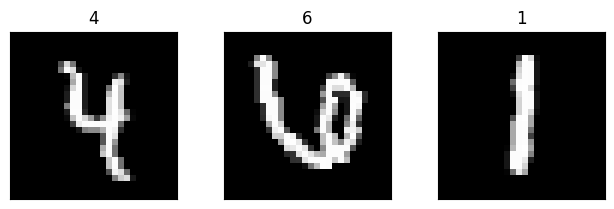

In [4]:
plot_dataset_sample(train_loader)

In [ ]:
device = torch.device("cuda" if cuda else "cpu")
model = Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = get_scheduler(optimizer)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  #test_losses[-1]
  scheduler.step(test_acc[-1]*0.01)
  #scheduler.step()
  
  

Epoch 1


Train: Loss=0.0172 Batch_id=937 Accuracy=93.55: 100%|██████████| 938/938 [00:36<00:00, 25.80it/s]


Test set: Average loss: 0.0419, Accuracy: 9859/10000 (98.59%)

Epoch 2


Train: Loss=0.1250 Batch_id=937 Accuracy=97.14: 100%|██████████| 938/938 [00:35<00:00, 26.62it/s]


Test set: Average loss: 0.0336, Accuracy: 9892/10000 (98.92%)

Epoch 3


Train: Loss=0.0043 Batch_id=937 Accuracy=97.57: 100%|██████████| 938/938 [00:36<00:00, 25.54it/s]


Test set: Average loss: 0.0283, Accuracy: 9908/10000 (99.08%)

Epoch 4


Train: Loss=0.1071 Batch_id=937 Accuracy=97.79: 100%|██████████| 938/938 [00:35<00:00, 26.53it/s]


Test set: Average loss: 0.0285, Accuracy: 9913/10000 (99.13%)

Epoch 5


Train: Loss=0.0172 Batch_id=937 Accuracy=98.05: 100%|██████████| 938/938 [00:35<00:00, 26.26it/s]


Test set: Average loss: 0.0255, Accuracy: 9924/10000 (99.24%)

Epoch 6


Train: Loss=0.0459 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:36<00:00, 25.72it/s]


Test set: Average loss: 0.0241, Accuracy: 9923/10000 (99.23%)

Epoch 7


Train: Loss=0.0316 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [00:35<00:00, 26.40it/s]


Test set: Average loss: 0.0249, Accuracy: 9928/10000 (99.28%)

Epoch 8


Train: Loss=0.0595 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [00:38<00:00, 24.65it/s]


Test set: Average loss: 0.0244, Accuracy: 9925/10000 (99.25%)

Epoch 00008: reducing learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0114 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:36<00:00, 25.45it/s]


Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

Epoch 10


Train: Loss=0.0031 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [00:39<00:00, 23.92it/s]


Test set: Average loss: 0.0205, Accuracy: 9936/10000 (99.36%)

Epoch 11


Train: Loss=0.0290 Batch_id=937 Accuracy=98.64: 100%|██████████| 938/938 [00:36<00:00, 25.81it/s]


Test set: Average loss: 0.0201, Accuracy: 9936/10000 (99.36%)

Epoch 12


Train: Loss=0.0089 Batch_id=937 Accuracy=98.60: 100%|██████████| 938/938 [00:42<00:00, 21.86it/s]


Test set: Average loss: 0.0204, Accuracy: 9941/10000 (99.41%)

Epoch 00012: reducing learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0217 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [00:42<00:00, 21.82it/s]


Test set: Average loss: 0.0199, Accuracy: 9940/10000 (99.40%)

Epoch 14


Train: Loss=0.0976 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:42<00:00, 22.11it/s]


Test set: Average loss: 0.0199, Accuracy: 9937/10000 (99.37%)

Epoch 15


Train: Loss=0.1151 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:44<00:00, 20.97it/s]


Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

Epoch 00015: reducing learning rate of group 0 to 1.0000e-04.
Epoch 16


  0%|          | 0/938 [00:00<?, ?it/s]

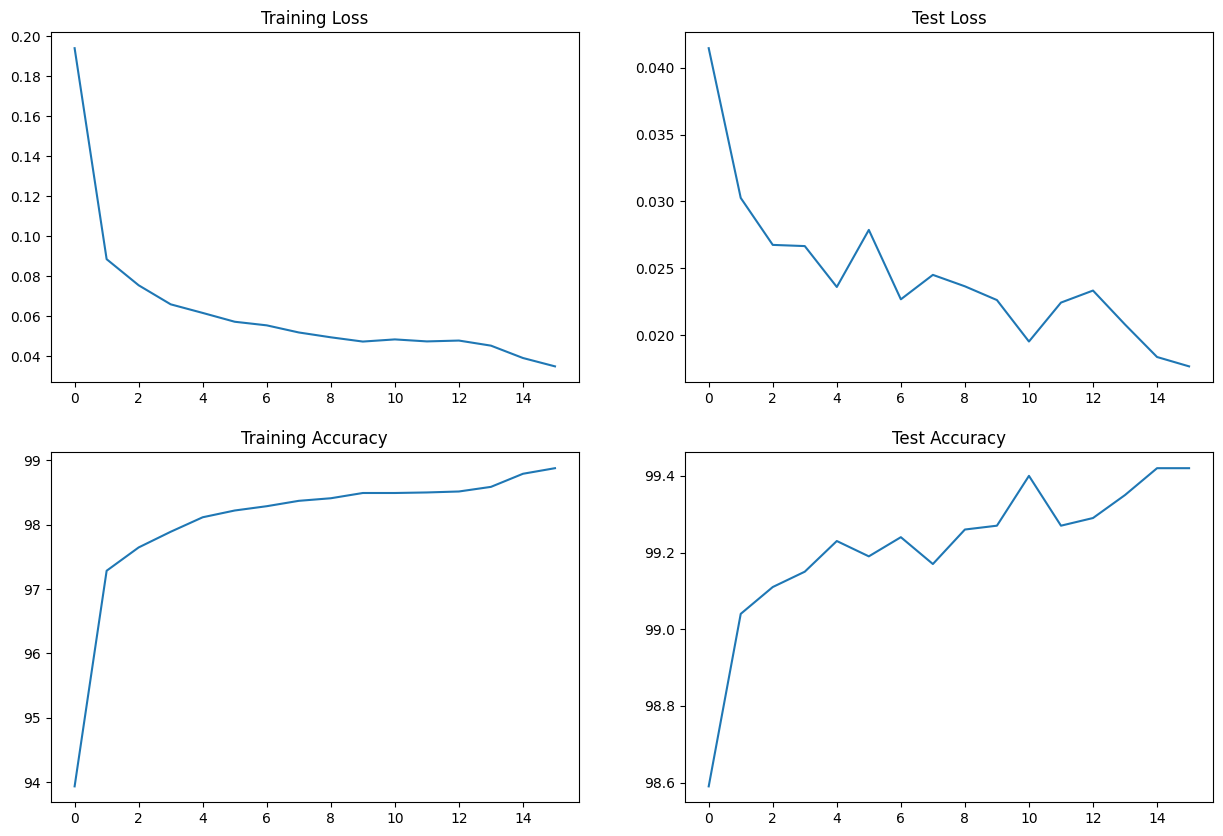

In [7]:
plot_model_performance()

In [5]:
device = torch.device("cuda" if cuda else "cpu")
model = Model().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             584
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
         Dropout2d-8            [-1, 8, 28, 28]               0
         MaxPool2d-9            [-1, 8, 14, 14]               0
           Conv2d-10           [-1, 12, 12, 12]             876
             ReLU-11           [-1, 12, 12, 12]               0
      BatchNorm2d-12           [-1, 12, 12, 12]              24
        Dropout2d-13           [-1, 12, 12, 12]               0
           Conv2d-14           [-1, 16,